In [1]:
#2a
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#reading in data 
df = pd.read_csv('data_all.csv')

#extracting relevant columns
phi_psi = df.iloc[: , 3:5].values.reshape(-1,2)

#func calculating optimal k-value with the silhouette method
def calc_silhouette(data,kmax):
    sil = []
    for k in range(2, kmax+1):
        kmeans = KMeans(n_clusters = k).fit(data)
        labels = kmeans.labels_
        sil.append(silhouette_score(data, labels, metric = 'euclidean'))
    
    return sil.index(max(sil))+2, max(sil)

In [2]:
# calculating the optimal k-value with the silhouette method 
res_1 = calc_silhouette(phi_psi, 10)
k_value_1 = res_1[0]
sil_1 = res_1[1]

print(f'According to the silhouette method,\nthe optimal number of clusters are: {k_value_1}')

According to the silhouette method,
the optimal number of clusters are: 3


In [3]:
# function returns WSS score for k values from 1 to kmax
def calc_WSS(data,kmax):
    sse = []
    k_values = list(range(1,kmax+1))
    for k in range(1, kmax+1):
        kmeans = KMeans(n_clusters = k).fit(data)
        centroids = kmeans.cluster_centers_
        pred_clusters = kmeans.predict(data)
        curr_sse = 0
    
    #calculate square of Euclidean distance of each point from its cluster center and add to current WSS
        for i in range(len(data)):
            curr_center = centroids[pred_clusters[i]]
            curr_sse += (data[i, 0] - curr_center[0]) ** 2 + (data[i, 1] - curr_center[1]) ** 2
            
        sse.append(curr_sse)
    return sse, k_values

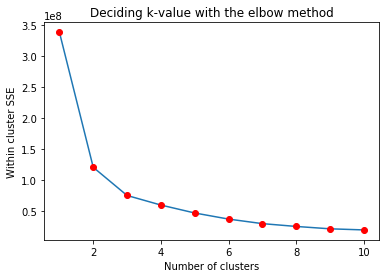

In [4]:
# deciding number of clusters trhough identifying 'elbow'
y,x = calc_WSS(phi_psi, 10)
#plotting to identify elbow 
plt.plot(x,y)
plt.plot(x,y, 'ro')
plt.xlabel('Number of clusters')
plt.ylabel('Within cluster SSE')
plt.title('Deciding k-value with the elbow method')
plt.show()

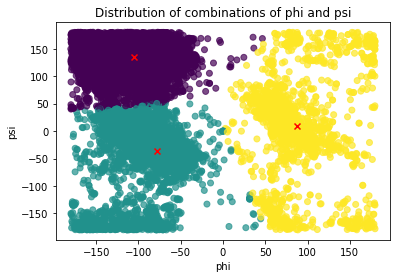

In [14]:
#kmeans clustering
kmeans = KMeans(n_clusters=k_value_1, random_state=0).fit(phi_psi)

#plotting
plt.scatter(phi_psi[:,0], phi_psi[:,1], alpha=0.7, c=kmeans.labels_.astype(float))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='r', marker='x')
plt.xlabel('phi')
plt.ylabel('psi')
plt.title('Distribution of combinations of phi and psi')
plt.show()

In [6]:
#2b - Validation - Silhoutte score of K-means clustering
print(f"The silhouette score is: {sil_1}")

The silhouette score is: 0.6724859788451587


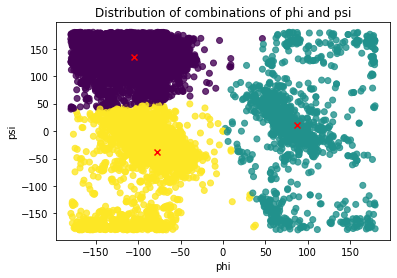

In [7]:
#2b - Validation - stability on subsets
np.random.seed(0)

# removing a random 40% av the data
fraction = 0.4
remove_n = int(fraction * int(len(df.index)))
drop_indices = np.random.choice(df.index, remove_n, replace=False)
df_subset = df.drop(drop_indices)

# extracting relevant columns and reshaping the periodic data
phi_psi_subset = df_subset.iloc[:, 3:5].values.reshape(-1,2)

# perform K-Means clustering with same parameters as full sample for comparison
kmeans = KMeans(n_clusters=k_value_1, random_state=0).fit(phi_psi_subset)

# scatter plot with cluster centroids
plt.scatter(phi_psi_subset[:,0], phi_psi_subset[:,1], c=kmeans.labels_.astype(float), alpha=0.8)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='r', marker='x')
plt.xlabel('phi')
plt.ylabel('psi')
plt.title('Distribution of combinations of phi and psi')
plt.show()

In [8]:
# calculating silhouette value to compare to total data set
res_sub = calc_silhouette(phi_psi_subset, 10)
sil_1_sub = res_sub[1]

print(f"The silhouette score is: {sil_1_sub},\n compared to {sil_1} for the total sample")

The silhouette score is: 0.6709041309328804,
 compared to 0.6724859788451587 for the total sample


In [9]:
#2d - modifying the data to better fit the K-means clustering method

#translating all angles to its' positive equivalency by using mod func.
phi_psi_pos = phi_psi%360

# calculating the optimal k-value with the silhouette method 
res = calc_silhouette(phi_psi_pos, 10)
k_value_2 = res[0]
sil_2 = res[1]

print(f'According to the silhouette method,\nthe optimal number of clusters are: {k_value_2}')

According to the silhouette method,
the optimal number of clusters are: 3


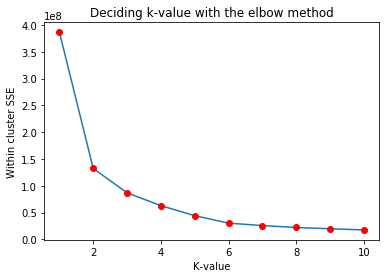

In [10]:
# deciding number of clusters through identifying 'elbow'
y,x = calc_WSS(phi_psi_pos, 10)

plt.plot(x, y)
plt.plot(x, y, 'ro')
plt.xlabel('K-value')
plt.ylabel('Within cluster SSE')
plt.title('Deciding k-value with the elbow method')
plt.show()

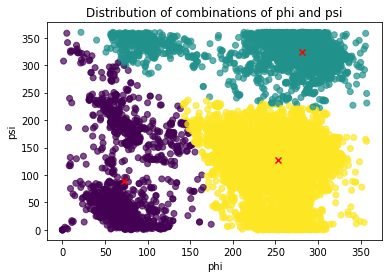

The silhouette score is: 0.6797531685533982


In [11]:
#kmeans
kmeans = KMeans(n_clusters=k_value_2, random_state=0).fit(phi_psi_pos)

#plotting
plt.scatter(phi_psi_pos[:,0], phi_psi_pos[:,1], alpha=0.7, c=kmeans.labels_.astype(float))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='r', marker='x')
plt.xlabel('phi')
plt.ylabel('psi')
plt.title('Distribution of combinations of phi and psi')
plt.show()

# silhouette score of K-Means clustering
print(f"The silhouette score is: {sil_2}")

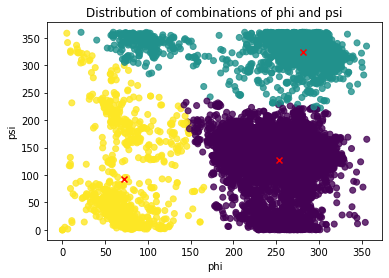

In [12]:
#Validation - stability on subsets
np.random.seed(0)

# removing a random 40% av the data
fraction = 0.4
remove_n = int(fraction * int(len(df.index)))
drop_indices = np.random.choice(df.index, remove_n, replace=False)
df_subset = df.drop(drop_indices)

# extracting relevant columns and reshaping the periodic data
phi_psi_pos_subset = df_subset.iloc[:, 3:5].values.reshape(-1,2)%360

# perform K-Means clustering with same parameters as full sample for comparison
kmeans = KMeans(n_clusters=k_value_2, random_state=0).fit(phi_psi_pos_subset)

# scatter plot with cluster centroids
plt.scatter(phi_psi_pos_subset[:,0], phi_psi_pos_subset[:,1], c=kmeans.labels_.astype(float), alpha=0.8)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='r', marker='x')
plt.xlabel('phi')
plt.ylabel('psi')
plt.title('Distribution of combinations of phi and psi')
plt.show()

In [13]:
# calculating silhouette value to compare to total data set
res_sub = calc_silhouette(phi_psi_pos_subset, 10)
sil_2_sub = res_sub[1]

print(f"The silhouette score is: {sil_2_sub},\n compared to {sil_2} for the total sample")

The silhouette score is: 0.677969006424792,
 compared to 0.6797531685533982 for the total sample
